In [1]:
import shutil
import glob
import tarfile
import ast
import mne
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from directory_tree import display_tree
from mne_connectivity import spectral_connectivity_epochs
from mne.datasets import sample
import numpy as np

In [88]:
# Read .set file

prepSignal_EC = mne.io.read_raw_eeglab('/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/sub-032301/sub-032301/sub-032301_EC.set', preload=True)
prepSignal_EO = mne.io.read_raw_eeglab('/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/sub-032301/sub-032301/sub-032301_EO.set', preload=True)
NoneDel_prepSignal = mne.io.read_raw_eeglab('/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/sub-032303/sub-032303/sub-032303_EC.set', preload=True)
rawSignal = mne.io.read_raw_brainvision('/workspace/brail_poc3/experiments/Lemon_Raw/sub-032301/RSEEG/sub-032301.vhdr', preload=True)

Reading /workspace/brail_poc3/experiments/Lemon_PreEEGLAB/sub-032301/sub-032301/sub-032301_EC.fdt
Reading 0 ... 119344  =      0.000 ...   477.376 secs...


/tmp/ipykernel_283027/857317482.py:3: RuntimeWarning: Data file name in EEG.data (sub-010002_EC.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032301_EC.fdt).
  prepSignal_EC = mne.io.read_raw_eeglab('/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/sub-032301/sub-032301/sub-032301_EC.set', preload=True)


Reading /workspace/brail_poc3/experiments/Lemon_PreEEGLAB/sub-032301/sub-032301/sub-032301_EO.fdt
Reading 0 ... 117860  =      0.000 ...   471.440 secs...


/tmp/ipykernel_283027/857317482.py:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  prepSignal_EC = mne.io.read_raw_eeglab('/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/sub-032301/sub-032301/sub-032301_EC.set', preload=True)
/tmp/ipykernel_283027/857317482.py:3: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  prepSignal_EC = mne.io.read_raw_eeglab('/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/sub-032301/sub-032301/sub-032301_EC.set', preload=True)
/tmp/ipykernel_283027/857317482.py:4: RuntimeWarning: Data file name in EEG.data (sub-010002_EO.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032301_EO.fdt).
  prepSignal_EO = mne.io.read_raw_eeglab('/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/sub-032301/sub-032301/sub-032301_EO.set', preload=True)


Reading /workspace/brail_poc3/experiments/Lemon_PreEEGLAB/sub-032303/sub-032303/sub-032303_EC.fdt
Reading 0 ... 119277  =      0.000 ...   477.108 secs...


/tmp/ipykernel_283027/857317482.py:4: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  prepSignal_EO = mne.io.read_raw_eeglab('/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/sub-032301/sub-032301/sub-032301_EO.set', preload=True)
/tmp/ipykernel_283027/857317482.py:4: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  prepSignal_EO = mne.io.read_raw_eeglab('/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/sub-032301/sub-032301/sub-032301_EO.set', preload=True)
/tmp/ipykernel_283027/857317482.py:5: RuntimeWarning: Data file name in EEG.data (sub-010004_EC.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032303_EC.fdt).
  NoneDel_prepSignal = mne.io.read_raw_eeglab('/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/sub-032303/sub-032303/sub-032303_EC.set', preload=True)


Extracting parameters from /workspace/brail_poc3/experiments/Lemon_Raw/sub-032301/RSEEG/sub-032301.vhdr...
Setting channel info structure...
Reading 0 ... 2554999  =      0.000 ...  1022.000 secs...


/tmp/ipykernel_283027/857317482.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  NoneDel_prepSignal = mne.io.read_raw_eeglab('/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/sub-032303/sub-032303/sub-032303_EC.set', preload=True)
/tmp/ipykernel_283027/857317482.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  NoneDel_prepSignal = mne.io.read_raw_eeglab('/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/sub-032303/sub-032303/sub-032303_EC.set', preload=True)


In [4]:
prepSignal_EC.interpolate_bads()

/tmp/ipykernel_283027/1421322003.py:1: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  prepSignal_EC.interpolate_bads()


<RawEEGLAB | sub-032301_EC.fdt, 59 x 119345 (477.4 s), ~53.8 MB, data loaded>

In [5]:
from mne.datasets import sample

print(__doc__)

data_path = sample.data_path()
meg_path = data_path / "MEG" / "sample"
fname = meg_path / "sample_audvis-ave.fif"
evoked = mne.read_evokeds(fname, condition="Left Auditory", baseline=(None, 0))


Automatically created module for IPython interactive environment
Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|██████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 869GB/s]
Untarring contents of '/root/mne_data/MNE-sample-data-processed.tar.gz' to '/root/mne_data'


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Download complete in 02m04s (1576.2 MB)
Reading /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)


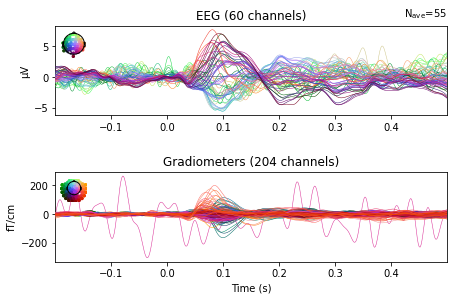

In [6]:
evoked.plot(exclude=[], picks=("grad", "eeg"));

In [8]:
evoked.info['bads']

['MEG 2443', 'EEG 053']

In [9]:
evoked.info

<Info | 16 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 maxshield: False
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: on, PCA-v2: on, PCA-v3: on, Average EEG reference: on
 sfreq: 600.6 Hz
>

In [10]:
del_ch = pd.read_csv("/workspace/brail_poc3/notebooks/Chen/Sub_channel_list.csv", index_col=0)
del_ch[del_ch["ID"] == "sub-032465"]

,ID,channel,del_channel,del_channel_number
147,sub-032465,"['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', '...","['Cz', 'VEOG']","[13, 16]"


In [12]:
del_ch[del_ch["ID"] == "sub-032301"]

,ID,channel,del_channel,del_channel_number
0,sub-032301,"['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', '...","['T7', 'VEOG', 'TP7']","[11, 16, 48]"


In [68]:
del_ch

,ID,channel,del_channel,del_channel_number
0,sub-032301,"['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', '...","['T7', 'VEOG', 'TP7']","[11, 16, 48]"
1,sub-032302,"['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', '...","['T7', 'VEOG']","[11, 16]"
2,sub-032303,"['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', '...",['VEOG'],[16]
3,sub-032304,"['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', '...",['VEOG'],[16]
4,sub-032305,"['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', '...","['T7', 'VEOG']","[11, 16]"
...,...,...,...,...
196,sub-032523,"['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', '...","['VEOG', 'FC4', 'TP7', 'TP8']","[16, 42, 48, 52]"
197,sub-032524,"['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', '...",['VEOG'],[16]
198,sub-032525,"['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', '...","['VEOG', 'FC3']","[16, 41]"
199,sub-032526,"['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', '...","['VEOG', 'CP2', 'F2']","[16, 19, 38]"


In [113]:
def InsertCh(Ch_name, raw):
    # Need NoneDel_prepSignal to get local info
    
    prep_len = raw._data.shape[1]
#     new_channel_chs = raw.info['chs'][-1]
#     new_channel_chs['ch_name'] = Ch_name
#     new_channel_chs['scanno'] = new_channel_chs['scanno']+1
#     new_channel_chs['logno'] = new_channel_chs['logno']+1
#     new_channel_chs['loc'] = [item.get('loc') for item in NoneDel_prepSignal.info['chs'] if(item['ch_name'] == Ch_name)][0]
#     print(new_channel_chs)
    
    new_channel_data = np.array([0] * prep_len)
    new_channel_info = mne.create_info(ch_names=[Ch_name], sfreq=raw.info['sfreq'], ch_types=['eeg'])
    new_channel_info['chs'][0]['loc'] = [item.get('loc') for item in NoneDel_prepSignal.info['chs'] if(item['ch_name'] == Ch_name)][0]
    print(new_channel_info['chs'])
    new_channel_data = new_channel_data[np.newaxis, :]  # 新しいチャンネルデータを適切な形式に変換
    new_raw = mne.io.RawArray(new_channel_data, new_channel_info)
    raw.add_channels([new_raw], force_update_info=True)
    return raw

def InterpolateCh(ID, raw):
    # For EC, Need del_ch
    
    CH = del_ch[del_ch["ID"] == ID]['del_channel']
    del_Ch_list = ast.literal_eval(CH.tolist()[0])
    prepSignal_EC_inte = raw.copy()

    for i in [item for item in del_Ch_list if item != 'VEOG']:
        prepSignal_EC_inte = InsertCh(i, prepSignal_EC_inte)
        prepSignal_EC_inte.info["bads"].append(i)

    prepSignal_EC_inte.info

    # Interpolate channels
    prepSignal_EC_inte = prepSignal_EC_inte.interpolate_bads()

    # Reorder Channel
    Ch_order = NoneDel_prepSignal.ch_names
    prepSignal_EC_inte.reorder_channels(Ch_order)
    
    return prepSignal_EC_inte


In [111]:
interTest = InterpolateCh('sub-032301', prepSignal_EC)

[{'loc': array([-8.45385386e-02,  5.17649254e-18, -8.84508251e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,             nan,             nan,
                   nan,             nan,             nan,             nan]), 'unit_mul': 0 (FIFF_UNITM_NONE), 'range': 1.0, 'cal': 1.0, 'kind': 2 (FIFFV_EEG_CH), 'coil_type': 1 (FIFFV_COIL_EEG), 'unit': 107 (FIFF_UNIT_V), 'coord_frame': 4 (FIFFV_COORD_HEAD), 'ch_name': 'T7', 'scanno': 1, 'logno': 1}]
Creating RawArray with float64 data, n_channels=1, n_times=119345
    Range : 0 ... 119344 =      0.000 ...   477.376 secs
Ready.
[{'loc': array([-0.08041001, -0.0262075 , -0.0085086 ,  0.        ,  0.        ,
        0.        ,         nan,         nan,         nan,         nan,
               nan,         nan]), 'unit_mul': 0 (FIFF_UNITM_NONE), 'range': 1.0, 'cal': 1.0, 'kind': 2 (FIFFV_EEG_CH), 'coil_type': 1 (FIFFV_COIL_EEG), 'unit': 107 (FIFF_UNIT_V), 'coord_frame': 4 (FIFFV_COORD_HEAD), 'ch_name': 'TP7', 'scanno': 1, 'logno':

In [72]:
Ch_order = NoneDel_prepSignal.ch_names

In [78]:
[item.get('loc') for item in NoneDel_prepSignal.info['chs'] if(item['ch_name'] == 'T7')]

[array([-8.45385386e-02,  5.17649254e-18, -8.84508251e-03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,             nan,             nan,
                    nan,             nan,             nan,             nan])]

In [102]:
prepSignal_EC_inte.info['chs']

[{'loc': array([-0.02613301,  0.08078401, -0.00400108,  0.        ,  0.        ,
          0.        ,         nan,         nan,         nan,         nan,
                 nan,         nan]),
  'unit_mul': 0 (FIFF_UNITM_NONE),
  'range': 1.0,
  'cal': 1e-06,
  'kind': 2 (FIFFV_EEG_CH),
  'coil_type': 1 (FIFFV_COIL_EEG),
  'unit': 107 (FIFF_UNIT_V),
  'coord_frame': 4 (FIFFV_COORD_HEAD),
  'ch_name': 'Fp1',
  'scanno': 1,
  'logno': 1},
 {'loc': array([ 0.02613301,  0.08078401, -0.00400108,  0.        ,  0.        ,
          0.        ,         nan,         nan,         nan,         nan,
                 nan,         nan]),
  'unit_mul': 0 (FIFF_UNITM_NONE),
  'range': 1.0,
  'cal': 1e-06,
  'kind': 2 (FIFFV_EEG_CH),
  'coil_type': 1 (FIFFV_COIL_EEG),
  'unit': 107 (FIFF_UNIT_V),
  'coord_frame': 4 (FIFFV_COORD_HEAD),
  'ch_name': 'Fp2',
  'scanno': 2,
  'logno': 2},
 {'loc': array([-0.06842334,  0.04987138, -0.00748952,  0.        ,  0.        ,
          0.        ,         nan,     

In [103]:
for index, i in enumerate(Ch_order):
    print(index, i)

0 Fp1
1 Fp2
2 F7
3 F3
4 Fz
5 F4
6 F8
7 FC5
8 FC1
9 FC2
10 FC6
11 T7
12 C3
13 Cz
14 C4
15 T8
16 CP5
17 CP1
18 CP2
19 CP6
20 AFz
21 P7
22 P3
23 Pz
24 P4
25 P8
26 PO9
27 O1
28 Oz
29 O2
30 PO10
31 AF7
32 AF3
33 AF4
34 AF8
35 F5
36 F1
37 F2
38 F6
39 FT7
40 FC3
41 FC4
42 FT8
43 C5
44 C1
45 C2
46 C6
47 TP7
48 CP3
49 CPz
50 CP4
51 TP8
52 P5
53 P1
54 P2
55 P6
56 PO7
57 PO3
58 POz
59 PO4
60 PO8


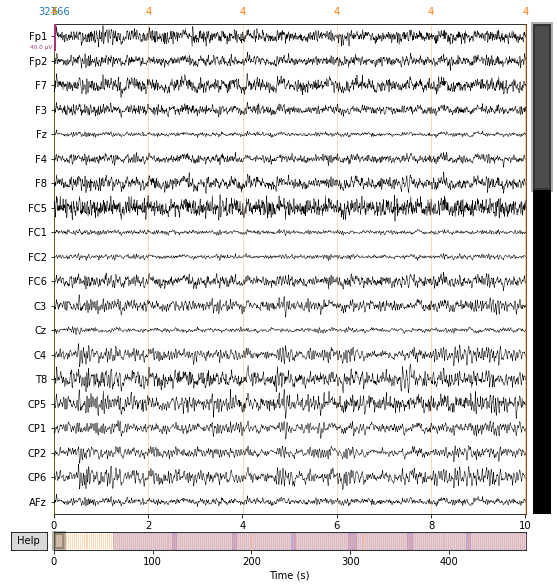

In [118]:
prepSignal_EC.plot();

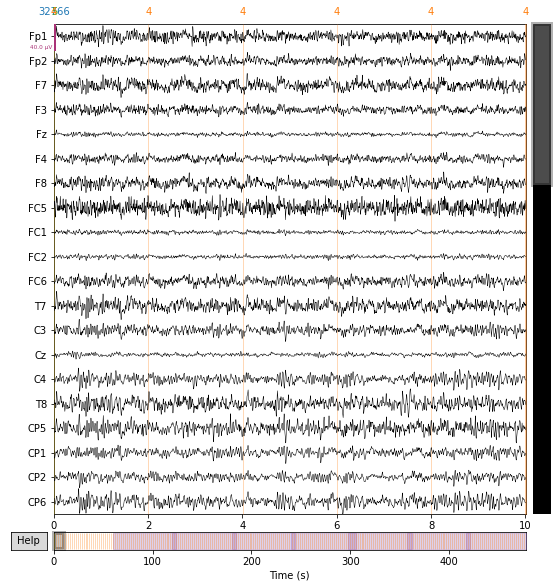

In [120]:
prepSignal_EC_inte.plot();